In [30]:
import pandas as pd
import numpy as np
%matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using matplotlib backend: TkAgg


ModuleNotFoundError: No module named 'seaborn'

In [2]:
plt.style.use('seaborn-whitegrid')
first_df = pd.read_excel('../Thesis-data/KineticExp03142018.xlsx')

In [3]:
first_df.head()

,Unnamed: 0,gamma,beta,alpha
0,Sample Name,Analyte Peak Area (counts),Analyte Peak Area (counts),Analyte Peak Area (counts)
1,.1 STD,15991,1748.7,1665.5
2,.1 STD,16060,1057.1,2314
3,.5 STD,30401,2743.8,3671
4,.5 STD,32490,2986.2,3517.9


In [4]:
first_df = first_df.rename(columns = {'Unnamed: 0':'Sample'})

In [5]:
first_df.head()

,Sample,gamma,beta,alpha
0,Sample Name,Analyte Peak Area (counts),Analyte Peak Area (counts),Analyte Peak Area (counts)
1,.1 STD,15991,1748.7,1665.5
2,.1 STD,16060,1057.1,2314
3,.5 STD,30401,2743.8,3671
4,.5 STD,32490,2986.2,3517.9


In [6]:
standard_df = pd.DataFrame(first_df.iloc[1:11])

In [7]:
standard_df = standard_df.rename(columns = {'Unnamed: 0':'Samples'})

In [16]:
first_df = first_df.iloc[11:]

In [17]:
first_df = first_df.reset_index(drop=True)
first_df = first_df.rename(columns = {'Unnamed: 0':'Samples'})

In [18]:
first_df.head()

,Sample,gamma,beta,alpha
0,1 aq,40087,6012.4,12009
1,1 aq,41729,5364.8,12596
2,1 s,350030,30501,43763
3,1 s,350960,30679,45509
4,2 aq,43523,5772.1,12923


In [35]:
std_col = standard_df.columns

In [38]:
standard_df['Sample'] = standard_df['Sample'].map(lambda x: x.lstrip('+-').rstrip('SsTtDd'))

In [39]:
standard_df[std_col] = standard_df[std_col].apply(pd.to_numeric)

In [47]:
standard_df = standard_df.groupby('Sample').mean().reset_index()

In [90]:
standard_df


,Sample,gamma,beta,alpha
0,0.1,16025.5,1402.90,1989.75
1,0.5,31445.5,2865.00,3594.45
2,1.0,64431.0,4855.55,7831.30
3,1.5,88480.5,7785.35,11055.50
4,2.0,121270.0,10518.00,15587.50


In [ ]:
x=standard_df['Sample']

In [66]:
gamma = standard_df['gamma']
beta = standard_df['beta']
alpha = standard_df['alpha']

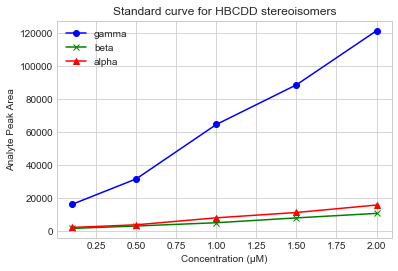

In [89]:
data = [gamma,beta,alpha]
marker = ['o','x','^']
color = ['b','g','r']
for i in range(3):
    plt.plot(x,data[i], '-'+ marker[i]+color[i])
    plt.xlabel('Concentration (μM)')
    plt.ylabel('Analyte Peak Area')
    plt.title('Standard curve for HBCDD stereoisomers')
plt.legend()    